# Free and Forced Oscillations with LabPartner

In this code, we will use labpartner to compelete do our analysis for the first year lab, free and forced oscillations. We will show how to use the package to do the entire analysis in a matter of two lines.

Let's start by importing the modules we will need:

In [1]:
import numpy as np # For Arrays
import labpartner_uom as lp # For the Analysis

For now, we'll generate some experimental data. It will have the correct theoretical result, with added noise. The data we generate includes:
- Displacement against Time for a Free Oscillation (with Damping)
- Amplitude against Frequency for a Forced Oscillation

In [2]:
# x vs t for a damped oscillation
t = np.linspace(0, 10, 1000)
gamma = 1
omega = 2 * np.pi
phi = np.pi / 4
x = 2 * np.exp (- gamma * t / 2) * np.cos(omega * t + phi) + np.random.uniform(-0.1, 0.1, len(t))
xerr = np.random.uniform(0.1, 0.2, len(t))

# A vs f for a forced oscillation
f = np.linspace(10, 14, 10)
f = np.append(f, np.linspace(14, 16, 20))
f = np.append(f, np.linspace(16, 20, 10))
w = 2 * np.pi * f

# Constants
F0 = 30.0  # Amplitude of driving force (you can adjust this)
omega0 = 2.0 * np.pi * 15.0  # Natural frequency (example: 1 Hz, converted to rad/s)
gamma = 0.2  # Mass of the oscillating object
m = 1 #mass

a = (F0 / m) / np.sqrt((omega0**2 - w**2)**2 + w**2 * gamma ** 2) + np.random.uniform(-0.001, 0.001, len(f))
aerr = np.random.uniform(0.004, 0.006, len(f))

[ 62.83185307  65.62437987  68.41690668  71.20943348  74.00196028
  76.79448709  79.58701389  82.37954069  85.1720675   87.9645943
  87.9645943   88.62598223  89.28737015  89.94875808  90.61014601
  91.27153394  91.93292186  92.59430979  93.25569772  93.91708564
  94.57847357  95.2398615   95.90124943  96.56263735  97.22402528
  97.88541321  98.54680113  99.20818906  99.86957699 100.53096491
 100.53096491 103.32349172 106.11601852 108.90854532 111.70107213
 114.49359893 117.28612573 120.07865254 122.87117934 125.66370614]


## Free Oscillations

Lets start simple: We know the formula for free damped oscillations and we will input it in our analysis. 

----------------------------------------
Fit Results
Fit = a * exp(b * x) * sin(c * x + d)
Fit Parameters:  ['a', 'b', 'c', 'd']
Fit Parameter Values:  [-2.01625791 -0.50278069  6.2814215   5.49457593]
Fit Parameter Errors:  [0.01217534 0.00415007 0.00392286 0.00540459]
Reduced Chi-Squared:  0.15940202460956665

Plot saved as myplot.png and myplot.pdf
----------------------------------------


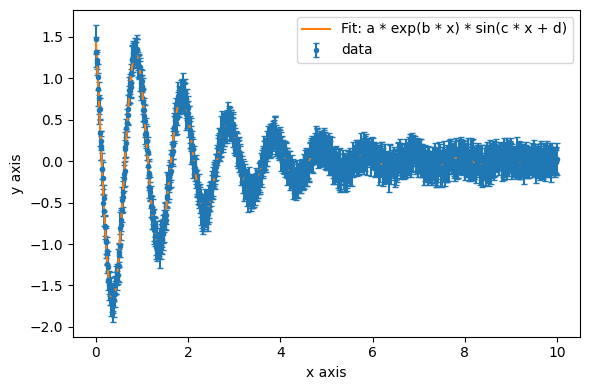

In [3]:
lp.analyse(t, x, xerr, fit="a * exp(b * x) * sin(c * x + d)")

This is good, but we want it to be presentable: maybe some axes, a bigger figure size. This should now look lab report worthy.

----------------------------------------
Fit Results
Fit = a * exp(-b * x) * sin(c * x + d)
Fit Parameters:  ['a', 'b', 'c', 'd']
Fit Parameter Values:  [ 2.01625792  0.50278069  6.28142145 -3.93020198]
Fit Parameter Errors:  [0.01217542 0.00415011 0.0039229  0.00540459]
Reduced Chi-Squared:  0.15940202460956002

Plot saved as freeoscillations-2.png and freeoscillations-2.pdf
----------------------------------------


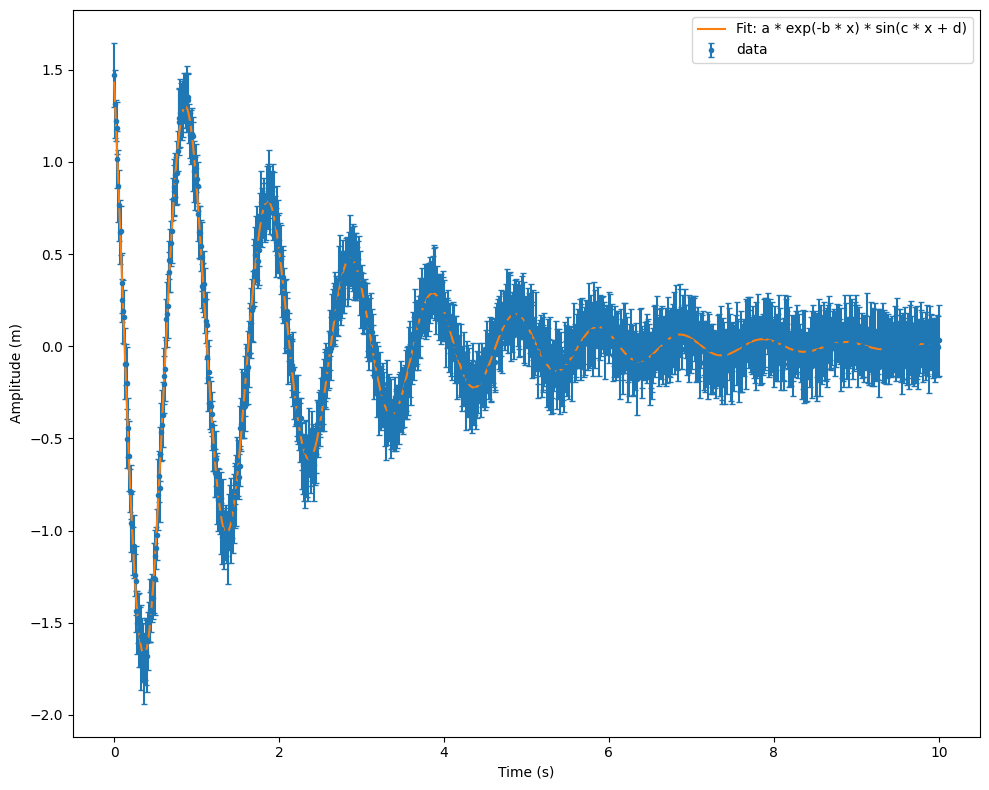

In [4]:
lp.analyse(t, x, xerr, fit="a * exp(-b * x) * sin(c * x + d)", xlabel="Time (s)", ylabel="Amplitude (m)", figsize=(10, 8), outfilename="freeoscillations-2")

## Forced Oscillations

There's two ways to do this part of the experiment: There is the power resonance curve and fitting a gaussian to it, or straight-up fitting the theory equation. Lets start with the power resonance:

/Users/user/Code/labpartner_uom/src/labpartner_uom/moduleAnalysis.py:73: OptimizeWarning: Covariance of the parameters could not be estimated
  self.popt, pcov = curve_fit(self.func_wrapper,


----------------------------------------
Fit Results
Fit = A*exp(-(x-B)**2/(2*C**2)) + D
Fit Parameters:  ['A', 'B', 'C', 'D']
Fit Parameter Values:  [1.00000000e+00 1.00000000e+00 1.00000000e+00 1.24748508e-04]
Fit Parameter Errors:  [inf inf inf inf]
Reduced Chi-Squared:  131.9545059888687

Plot saved as forcedoscillations-1.png and forcedoscillations-1.pdf
----------------------------------------


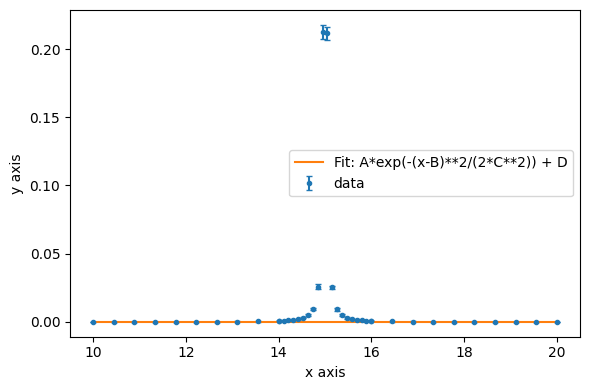

In [5]:
p = a ** 2
perr = abs(2 * a * aerr)

lp.analyse(f, p, perr, fit="Gaussian", outfilename="forcedoscillations-1")

This fit didn't work! Sometimes, you need to give it guidance. From the result, you can gather the mean value will be 15. We can incorporate this information by setting predictions and bounds!

(For now you'll have to see the order of the params from the plot, but I'll try to make it better promise!)

----------------------------------------
Fit Results
Fit = A*exp(-(x-B)**2/(2*C**2)) + D
Fit Parameters:  ['A', 'B', 'C', 'D']
Fit Parameter Values:  [2.73427324e-01 1.49994672e+01 7.30772337e-02 1.11806518e-04]
Fit Parameter Errors:  [1.88647374e-02 3.82563084e-03 2.73562502e-03 6.28765239e-05]
Reduced Chi-Squared:  12.839276716274755

Plot saved as forcedoscillations-2.png and forcedoscillations-2.pdf
----------------------------------------


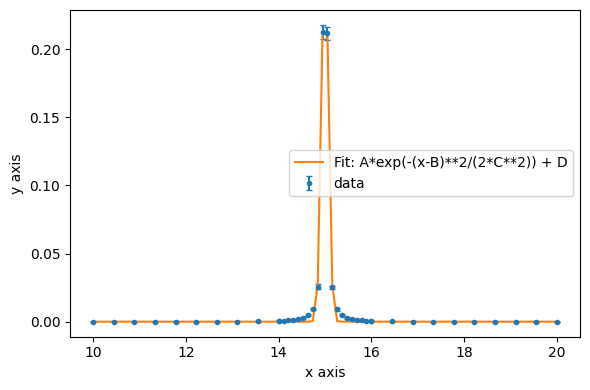

In [6]:
predictions = [0.2, 15, 1, 0]
bounds = ([0., 14.5, -np.inf, -np.inf], [np.inf, 15.5, np.inf, np.inf])
lp.analyse(f, p, perr, fit="Gaussian", predictions=predictions, bounds=bounds, outfilename="forcedoscillations-2")

Much Better! Still, we can do a more formal analysis. Let's see how we do when we use the physical analysis. The experimentalist would know the mass they use, and by eye we can expect omega0 to be 15 again.

----------------------------------------
Fit Results
Fit = (f / m) / sqrt((w**2 - x**2)**2 + x**2 * g**2)
Fit Parameters:  ['f', 'm', 'w', 'g']
Fit Parameter Values:  [ 0.27575935  0.36262028 15.00004794 -0.03234312]
Fit Parameter Errors:  [5.40795375e+04 7.11139768e+04 5.06741968e-05 7.46346177e-04]
Reduced Chi-Squared:  0.01150024634643436

Plot saved as forcedoscillations-3.png and forcedoscillations-3.pdf
----------------------------------------


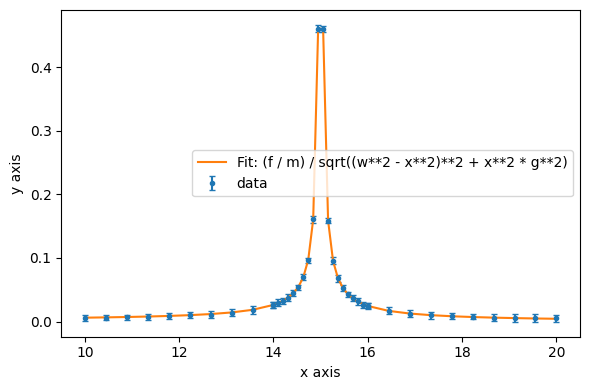

In [7]:
predictions = [1, 1, 15, 1]
bounds = ([-np.inf, -np.inf, 14.5, -np.inf], [np.inf, np.inf, 15.5, np.inf])
lp.analyse(f, a, aerr, fit= "(f / m) / sqrt((w**2 - x**2)**2 + x**2 * g**2)", outfilename="forcedoscillations-3")